In [1]:
#  Copyright (c) 2022 Charlie Payne
#  Licence: GNU GPLv3

## read in data, generate features, and impute

# load in the data from 1.csv

import pandas as pd

data_dir = '../data/sub_archive'

df = pd.read_csv(data_dir + '/1.csv/1.csv', header=None)
print(df)

         0      1    2       3        4        5        6        7        8   \
0       1.0  100.0  1.0     1.0  -8.0053 -13.0829 -20.5564   4.2336  -8.7248   
1       1.0  100.0  1.0     2.0  -8.8933 -14.1654 -21.8203   3.3877  -9.7117   
2       1.0  100.0  1.0     3.0  -8.9066 -16.4452 -22.7497   3.4377  -9.2680   
3       1.0  100.0  1.0     4.0  -9.7299 -19.1422 -25.0143   1.5351 -11.2621   
4       1.0  100.0  1.0     5.0 -11.2229 -20.6806 -27.1648  -1.9990 -14.7915   
...     ...    ...  ...     ...      ...      ...      ...      ...      ...   
887803  1.0    9.0  3.0  3068.0  26.9226  21.0221  22.0123  40.9959  32.3444   
887804  1.0    9.0  3.0  3069.0  27.9276  22.1112  25.3971  42.6215  33.2021   
887805  1.0    9.0  3.0  3070.0  29.9885  23.1951  27.6409  46.0617  35.9610   
887806  1.0    9.0  3.0  3071.0  31.0762  23.8375  28.1827  47.2404  37.2302   
887807  1.0    9.0  3.0  3072.0  31.6135  25.0166  27.6945  46.2060  35.7613   

             9   ...       64       65 

In [2]:
# assign the header

import csv

meta_dir = '../data/meta_archive'
with open(meta_dir + '/columnLabels.csv', 'r') as fin:
    heading = list(csv.reader(fin))[0]

print(heading, '\n')

df.columns = heading
df['subject'] = df['subject'].astype('int')
df['trial'] = df['trial'].astype('int')
df['condition'] = df['condition'].astype('int')
df['sample'] = df['sample'].astype('int')
print(df)

['subject', 'trial', 'condition', 'sample', 'Fp1', 'AF7', 'AF3', 'F1', 'F3', 'F5', 'F7', 'FT7', 'FC5', 'FC3', 'FC1', 'C1', 'C3', 'C5', 'T7', 'TP7', 'CP5', 'CP3', 'CP1', 'P1', 'P3', 'P5', 'P7', 'P9', 'PO7', 'PO3', 'O1', 'Iz', 'Oz', 'POz', 'Pz', 'CPz', 'Fpz', 'Fp2', 'AF8', 'AF4', 'AFz', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT8', 'FC6', 'FC4', 'FC2', 'FCz', 'Cz', 'C2', 'C4', 'C6', 'T8', 'TP8', 'CP6', 'CP4', 'CP2', 'P2', 'P4', 'P6', 'P8', 'P10', 'PO8', 'PO4', 'O2', 'VEOa', 'VEOb', 'HEOL', 'HEOR', 'Nose', 'TP10'] 

        subject  trial  condition  sample      Fp1      AF7      AF3       F1  \
0             1    100          1       1  -8.0053 -13.0829 -20.5564   4.2336   
1             1    100          1       2  -8.8933 -14.1654 -21.8203   3.3877   
2             1    100          1       3  -8.9066 -16.4452 -22.7497   3.4377   
3             1    100          1       4  -9.7299 -19.1422 -25.0143   1.5351   
4             1    100          1       5 -11.2229 -20.6806 -27.1648  -1.9990   
... 

In [3]:
# explore some of the meta data

subjects = set(df['subject'])
trials = set(df['trial'])
conditions = set(df['condition'])
samples = set(df['sample'])

print(f"subjects = {subjects}", '\n')      # subjects = participants, 1.csv is control (group: 0 = HC, 1 = SZ), see archive/demographic.csv and Kaggle page
print(f"trials = {trials}", '\n')          # trials ?= 100 tones played, see paper
print(f"conditions = {conditions}", '\n')  # conditions ?= button tone, play tone, and button alone, see paper
print(f"samples = {samples}", '\n')        # samples = time points, see archive/time.csv

subjects = {1} 

trials = {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100} 

conditions = {1, 2, 3} 

samples = {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 1

In [4]:
# pick out an example

dfex = df[(df['condition'] == 1) & (df['trial'] == 1)]
dfex.reset_index(inplace=True, drop=True)
print(dfex)

      subject  trial  condition  sample      Fp1      AF7      AF3       F1  \
0           1      1          1       1 -39.1092 -23.5659 -26.9088  26.5926   
1           1      1          1       2 -34.8801 -17.8868 -18.9016  29.7812   
2           1      1          1       3 -40.0277 -19.1280 -19.7980  27.6737   
3           1      1          1       4 -43.2446 -22.5881 -22.0479  26.0501   
4           1      1          1       5 -46.6821 -27.1396 -25.4859  23.7218   
...       ...    ...        ...     ...      ...      ...      ...      ...   
3067        1      1          1    3068  22.1977  13.2489  38.1627  -7.9700   
3068        1      1          1    3069  23.2485  16.6260  40.6855  -5.7396   
3069        1      1          1    3070  22.9153  17.9005  43.0367  -3.5611   
3070        1      1          1    3071  20.8366  17.3385  42.4662  -1.4365   
3071        1      1          1    3072  20.8606  18.3519  43.7525   0.8348   

           F3       F5  ...      P10      PO8      

In [5]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'condition = 1, trial = 1')

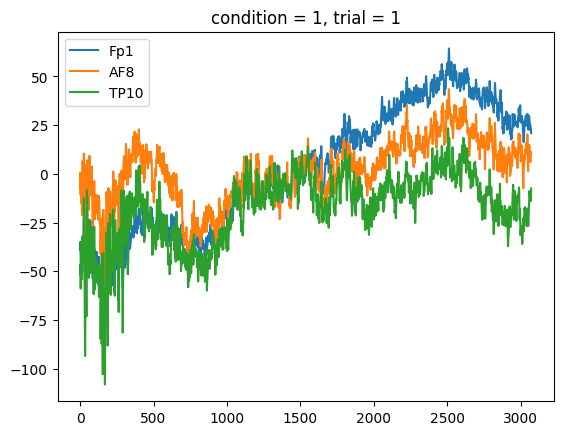

In [6]:
# plot from first example

plt.plot(dfex['sample'], dfex['Fp1'], label='Fp1')
plt.plot(dfex['sample'], dfex['AF8'], label='AF8')
plt.plot(dfex['sample'], dfex['TP10'], label='TP10')
plt.legend()
plt.title('condition = 1, trial = 1')

In [7]:
# pick out more examples

dfex10 = df[(df['condition'] == 1) & (df['trial'] == 10)]
dfex20 = df[(df['condition'] == 1) & (df['trial'] == 20)]
dfex30 = df[(df['condition'] == 1) & (df['trial'] == 30)]
dfex40 = df[(df['condition'] == 1) & (df['trial'] == 40)]
dfex50 = df[(df['condition'] == 1) & (df['trial'] == 50)]
dfex60 = df[(df['condition'] == 1) & (df['trial'] == 60)]
dfex70 = df[(df['condition'] == 1) & (df['trial'] == 70)]
dfex80 = df[(df['condition'] == 1) & (df['trial'] == 80)]
dfex90 = df[(df['condition'] == 1) & (df['trial'] == 90)]
dfex100 = df[(df['condition'] == 1) & (df['trial'] == 100)]

Text(0.5, 1.0, 'Fp1(time)')

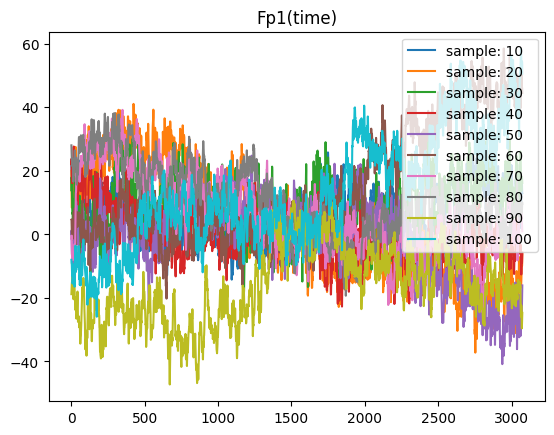

In [8]:
# plot further examples: Fp1

fig1 = plt.figure(1)
plt.plot(dfex10['sample'], dfex10['Fp1'], label='sample: 10')
plt.plot(dfex20['sample'], dfex20['Fp1'], label='sample: 20')
plt.plot(dfex30['sample'], dfex30['Fp1'], label='sample: 30')
plt.plot(dfex40['sample'], dfex40['Fp1'], label='sample: 40')
plt.plot(dfex50['sample'], dfex50['Fp1'], label='sample: 50')
plt.plot(dfex60['sample'], dfex60['Fp1'], label='sample: 60')
plt.plot(dfex70['sample'], dfex70['Fp1'], label='sample: 70')
plt.plot(dfex80['sample'], dfex80['Fp1'], label='sample: 80')
plt.plot(dfex90['sample'], dfex90['Fp1'], label='sample: 90')
plt.plot(dfex100['sample'], dfex100['Fp1'], label='sample: 100')
plt.legend()
plt.title('Fp1(time)')

# fig2 = plt.figure(2)
# #plt.plot(dfex10['sample'], dfex10['Fp1'], label='sample: 10')
# plt.plot(dfex20['sample'], dfex20['Fp1'], label='sample: 20')
# #plt.plot(dfex30['sample'], dfex30['Fp1'], label='sample: 30')
# plt.plot(dfex40['sample'], dfex40['Fp1'], label='sample: 40')
# #plt.plot(dfex50['sample'], dfex50['Fp1'], label='sample: 50')
# plt.plot(dfex60['sample'], dfex60['Fp1'], label='sample: 60')
# #plt.plot(dfex70['sample'], dfex70['Fp1'], label='sample: 70')
# plt.plot(dfex80['sample'], dfex80['Fp1'], label='sample: 80')
# #plt.plot(dfex90['sample'], dfex90['Fp1'], label='sample: 90')
# plt.plot(dfex100['sample'], dfex100['Fp1'], label='sample: 100')
# plt.legend()
# plt.title('Fp1(time)')

Text(0.5, 1.0, 'TP10(time)')

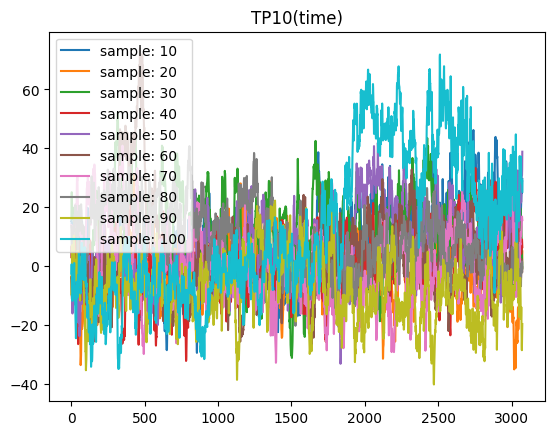

In [9]:
# plot further examples: TP10

fig1 = plt.figure(1)
plt.plot(dfex10['sample'], dfex10['TP10'], label='sample: 10')
plt.plot(dfex20['sample'], dfex20['TP10'], label='sample: 20')
plt.plot(dfex30['sample'], dfex30['TP10'], label='sample: 30')
plt.plot(dfex40['sample'], dfex40['TP10'], label='sample: 40')
plt.plot(dfex50['sample'], dfex50['TP10'], label='sample: 50')
plt.plot(dfex60['sample'], dfex60['TP10'], label='sample: 60')
plt.plot(dfex70['sample'], dfex70['TP10'], label='sample: 70')
plt.plot(dfex80['sample'], dfex80['TP10'], label='sample: 80')
plt.plot(dfex90['sample'], dfex90['TP10'], label='sample: 90')
plt.plot(dfex100['sample'], dfex100['TP10'], label='sample: 100')
plt.legend()
plt.title('TP10(time)')

In [10]:
# get all the trials...

all_trials = []
for ii in range(100):
    all_trials.append(df[(df['condition'] == 1) & (df['trial'] == ii+1)])

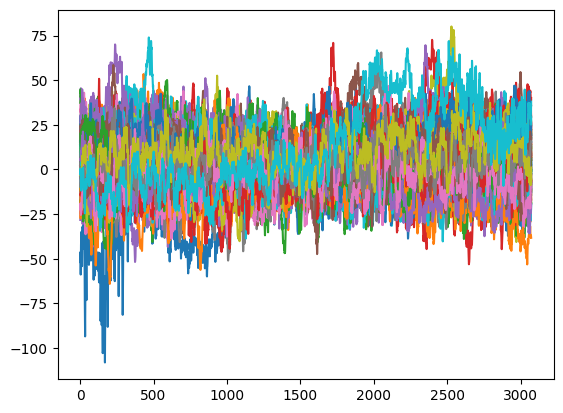

In [11]:
# ...and plot them all

fig1 = plt.figure(1)
for ii in range(100):
    plt.plot(all_trials[ii]['sample'], all_trials[ii]['TP10'])

In [12]:
# set up for feature extraction

dfex100 = dfex100.drop(columns=['condition', 'trial'])
print(dfex100, '\n')

df2 = pd.read_csv(data_dir + '/2.csv/2.csv', header=None)
df2.columns = heading
df2ex100 = df2[(df2['condition'] == 1) & (df2['trial'] == 100)]
df2ex100 = df2ex100.drop(columns=['condition', 'trial'])
print(df2ex100, '\n')

      subject  sample      Fp1      AF7      AF3      F1       F3       F5  \
0           1       1  -8.0053 -13.0829 -20.5564  4.2336  -8.7248   0.8437   
1           1       2  -8.8933 -14.1654 -21.8203  3.3877  -9.7117   1.7590   
2           1       3  -8.9066 -16.4452 -22.7497  3.4377  -9.2680   1.9539   
3           1       4  -9.7299 -19.1422 -25.0143  1.5351 -11.2621  -0.2113   
4           1       5 -11.2229 -20.6806 -27.1648 -1.9990 -14.7915  -3.2781   
...       ...     ...      ...      ...      ...     ...      ...      ...   
3067        1    3068  54.3704  32.4745  40.4396 -0.1291  -1.3389 -10.1509   
3068        1    3069  54.1032  35.7320  46.6141  1.7895  -1.0679  -7.7762   
3069        1    3070  54.3903  37.2453  51.4303  2.2454  -1.1516  -5.9156   
3070        1    3071  54.0769  36.8716  49.5086  0.3072  -2.3719  -7.1281   
3071        1    3072  50.5482  33.5290  44.2689 -3.7945  -6.1361 -11.2229   

          F7      FT7  ...      P10      PO8      PO4      O2  

In [13]:
# concatenate subject 1 and 2

dfok = pd.concat([dfex100, df2ex100])
dfok.reset_index(inplace=True, drop=True)
dfok['subject'] = dfok['subject'].astype('int')
dfok['sample'] = dfok['sample'].astype('int')
print(dfok)

      subject  sample       Fp1       AF7      AF3      F1       F3       F5  \
0           1       1   -8.0053  -13.0829 -20.5564  4.2336  -8.7248   0.8437   
1           1       2   -8.8933  -14.1654 -21.8203  3.3877  -9.7117   1.7590   
2           1       3   -8.9066  -16.4452 -22.7497  3.4377  -9.2680   1.9539   
3           1       4   -9.7299  -19.1422 -25.0143  1.5351 -11.2621  -0.2113   
4           1       5  -11.2229  -20.6806 -27.1648 -1.9990 -14.7915  -3.2781   
...       ...     ...       ...       ...      ...     ...      ...      ...   
6139        2    3068  102.6346  103.8657 -55.2819  3.5899  31.0824  60.4261   
6140        2    3069  101.6843  102.4004 -53.2728  4.7623  30.0216  59.6278   
6141        2    3070  103.4358  104.3711 -50.9429  5.3422  30.8124  60.9911   
6142        2    3071  104.4606  105.0235 -50.4945  5.5168  32.0759  61.8596   
6143        2    3072  103.3152  103.1069 -51.7234  5.2914  32.0965  61.0803   

            F7      FT7  ...       P10 

In [14]:
# https://tsfresh.readthedocs.io/en/latest/text/quick_start.html

from tsfresh import extract_features

In [15]:
# this takes a while to run (00:17:09), good to know!

extracted_features = extract_features(dfok, column_id="subject", column_sort="sample")

Feature Extraction: 100%|██████████████████████████████████████████████████████████████████████████| 10/10 [16:45<00:00, 100.55s/it]


In [16]:
exf = extracted_features
print(exf)

   Fp1__variance_larger_than_standard_deviation  Fp1__has_duplicate_max  \
1                                           1.0                     0.0   
2                                           1.0                     0.0   

   Fp1__has_duplicate_min  Fp1__has_duplicate  Fp1__sum_values  \
1                     0.0                 1.0       40636.7775   
2                     0.0                 1.0       23058.4842   

   Fp1__abs_energy  Fp1__mean_abs_change  Fp1__mean_change  \
1     1.457601e+06              1.571739          0.019067   
2     5.305627e+06              1.610186          0.030227   

   Fp1__mean_second_derivative_central  Fp1__median  ...  \
1                            -0.000430     10.16795  ...   
2                            -0.000623     -0.93235  ...   

   TP10__permutation_entropy__dimension_6__tau_1  \
1                                       4.883969   
2                                       5.043846   

   TP10__permutation_entropy__dimension_7__tau_1  

In [17]:
from tsfresh.utilities.dataframe_functions import impute

In [18]:
impute(exf)
print(exf)

/Users/charlie/virtualenvs/vepg/lib/python3.9/site-packages/tsfresh/utilities/dataframe_functions.py:198: RuntimeWarning: The columns ['Fp1__query_similarity_count__query_None__threshold_0.0'
 'AF7__query_similarity_count__query_None__threshold_0.0'
 'AF3__query_similarity_count__query_None__threshold_0.0'
 'F1__query_similarity_count__query_None__threshold_0.0'
 'F3__query_similarity_count__query_None__threshold_0.0'
 'F5__query_similarity_count__query_None__threshold_0.0'
 'F7__query_similarity_count__query_None__threshold_0.0'
 'FT7__query_similarity_count__query_None__threshold_0.0'
 'FC5__query_similarity_count__query_None__threshold_0.0'
 'FC3__query_similarity_count__query_None__threshold_0.0'
 'FC1__query_similarity_count__query_None__threshold_0.0'
 'C1__query_similarity_count__query_None__threshold_0.0'
 'C3__query_similarity_count__query_None__threshold_0.0'
 'C5__query_similarity_count__query_None__threshold_0.0'
 'T7__query_similarity_count__query_None__threshold_0.0'
 'TP

   Fp1__variance_larger_than_standard_deviation  Fp1__has_duplicate_max  \
1                                           1.0                     0.0   
2                                           1.0                     0.0   

   Fp1__has_duplicate_min  Fp1__has_duplicate  Fp1__sum_values  \
1                     0.0                 1.0       40636.7775   
2                     0.0                 1.0       23058.4842   

   Fp1__abs_energy  Fp1__mean_abs_change  Fp1__mean_change  \
1     1.457601e+06              1.571739          0.019067   
2     5.305627e+06              1.610186          0.030227   

   Fp1__mean_second_derivative_central  Fp1__median  ...  \
1                            -0.000430     10.16795  ...   
2                            -0.000623     -0.93235  ...   

   TP10__permutation_entropy__dimension_6__tau_1  \
1                                       4.883969   
2                                       5.043846   

   TP10__permutation_entropy__dimension_7__tau_1  

In [19]:
## test for putting the waves in series

# pull out condition 1 for patient 1

dfc1 = df[(df['condition'] == 1)]
print(dfc1)

        subject  trial  condition  sample      Fp1      AF7      AF3      F1  \
0             1    100          1       1  -8.0053 -13.0829 -20.5564  4.2336   
1             1    100          1       2  -8.8933 -14.1654 -21.8203  3.3877   
2             1    100          1       3  -8.9066 -16.4452 -22.7497  3.4377   
3             1    100          1       4  -9.7299 -19.1422 -25.0143  1.5351   
4             1    100          1       5 -11.2229 -20.6806 -27.1648 -1.9990   
...         ...    ...        ...     ...      ...      ...      ...     ...   
881659        1      9          1    3068 -15.0674 -13.6095  -0.1271  3.5329   
881660        1      9          1    3069 -15.6700 -13.2490  -1.2033  3.4647   
881661        1      9          1    3070 -17.0344 -13.6637  -2.4622  3.2145   
881662        1      9          1    3071 -20.1128 -17.2263  -4.5294  1.3816   
881663        1      9          1    3072 -22.1171 -19.3596  -6.6371 -0.4525   

             F3       F5  ...      P10 

In [20]:
# shift the samples in series wrt trial

def shift_it(row):
    row['sample'] += (row['trial']-1)*3072
    return row

dfc1[['sample', 'trial']] = dfc1[['sample', 'trial']].apply(lambda row: shift_it(row), axis=1)
print(dfc1)

        subject  trial  condition  sample      Fp1      AF7      AF3      F1  \
0             1    100          1  304129  -8.0053 -13.0829 -20.5564  4.2336   
1             1    100          1  304130  -8.8933 -14.1654 -21.8203  3.3877   
2             1    100          1  304131  -8.9066 -16.4452 -22.7497  3.4377   
3             1    100          1  304132  -9.7299 -19.1422 -25.0143  1.5351   
4             1    100          1  304133 -11.2229 -20.6806 -27.1648 -1.9990   
...         ...    ...        ...     ...      ...      ...      ...     ...   
881659        1      9          1   27644 -15.0674 -13.6095  -0.1271  3.5329   
881660        1      9          1   27645 -15.6700 -13.2490  -1.2033  3.4647   
881661        1      9          1   27646 -17.0344 -13.6637  -2.4622  3.2145   
881662        1      9          1   27647 -20.1128 -17.2263  -4.5294  1.3816   
881663        1      9          1   27648 -22.1171 -19.3596  -6.6371 -0.4525   

             F3       F5  ...      P10 

/var/folders/9y/z45c_yp550q79qkdqfhmw_4w0000gn/T/ipykernel_71809/1405680257.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc1[['sample', 'trial']] = dfc1[['sample', 'trial']].apply(lambda row: shift_it(row), axis=1)


        subject  trial  condition  sample      Fp1      AF7      AF3       F1  \
0             1      1          1       1 -39.1092 -23.5659 -26.9088  26.5926   
1             1      1          1       2 -34.8801 -17.8868 -18.9016  29.7812   
2             1      1          1       3 -40.0277 -19.1280 -19.7980  27.6737   
3             1      1          1       4 -43.2446 -22.5881 -22.0479  26.0501   
4             1      1          1       5 -46.6821 -27.1396 -25.4859  23.7218   
...         ...    ...        ...     ...      ...      ...      ...      ...   
307195        1    100          1  307196  54.3704  32.4745  40.4396  -0.1291   
307196        1    100          1  307197  54.1032  35.7320  46.6141   1.7895   
307197        1    100          1  307198  54.3903  37.2453  51.4303   2.2454   
307198        1    100          1  307199  54.0769  36.8716  49.5086   0.3072   
307199        1    100          1  307200  50.5482  33.5290  44.2689  -3.7945   

             F3       F5  .

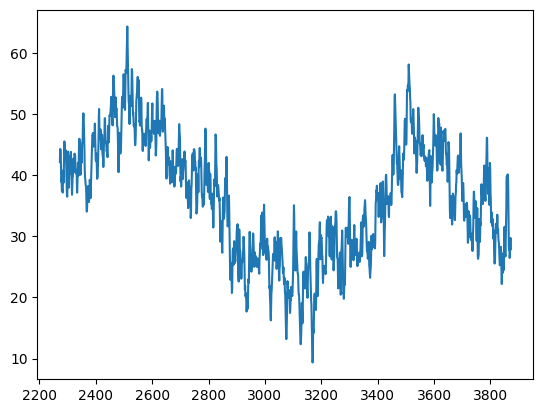

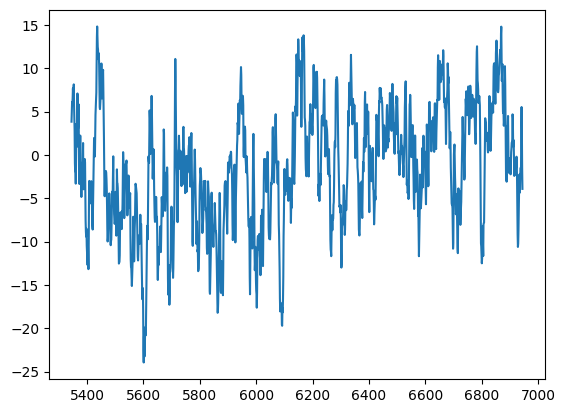

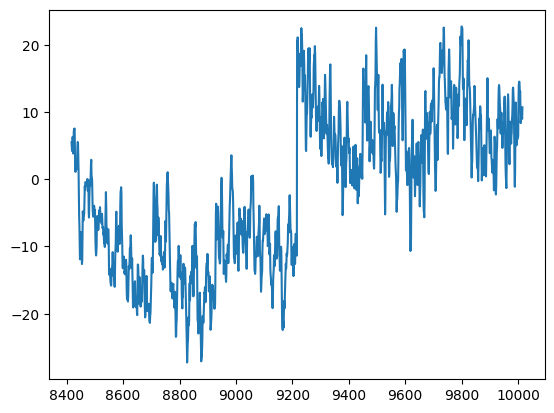

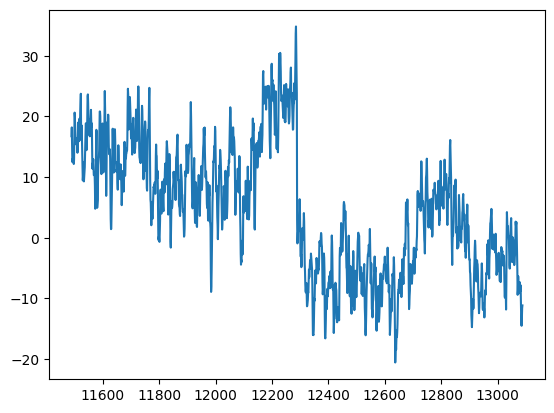

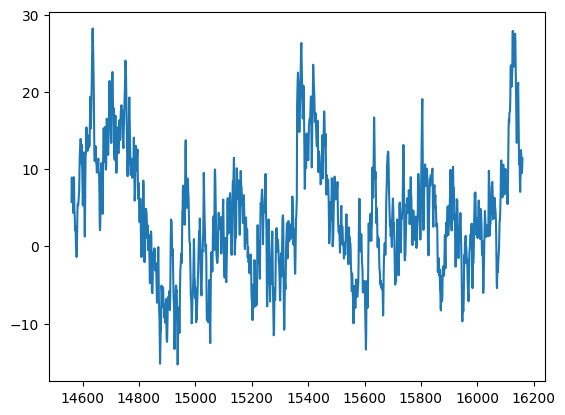

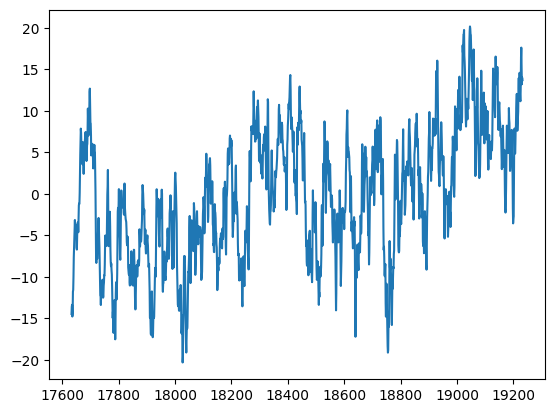

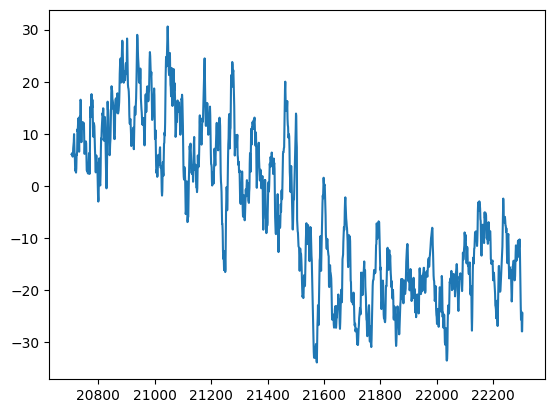

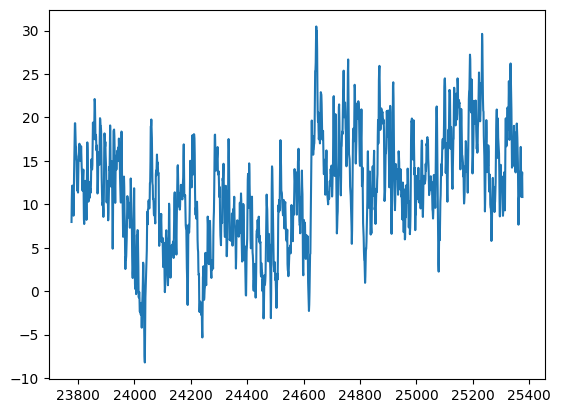

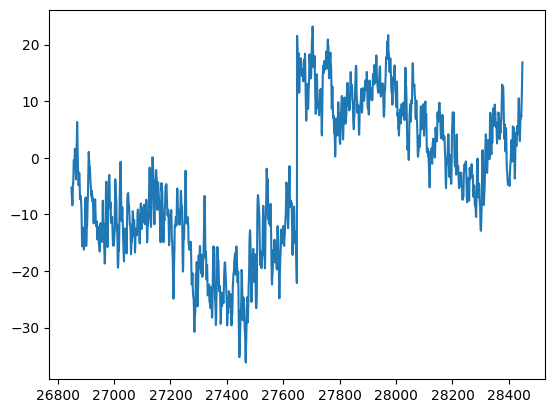

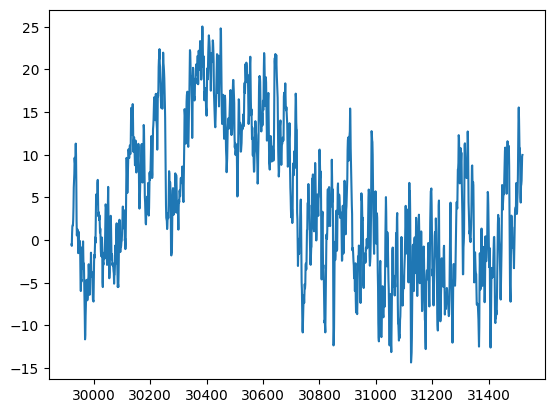

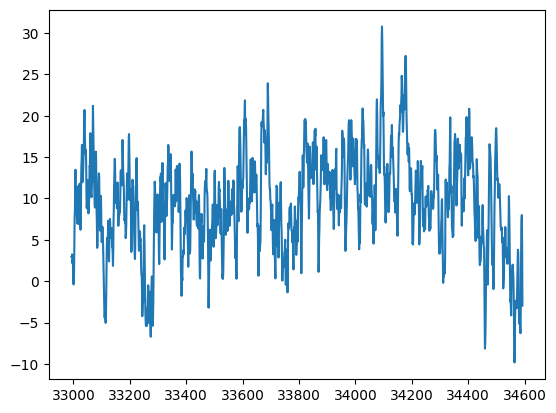

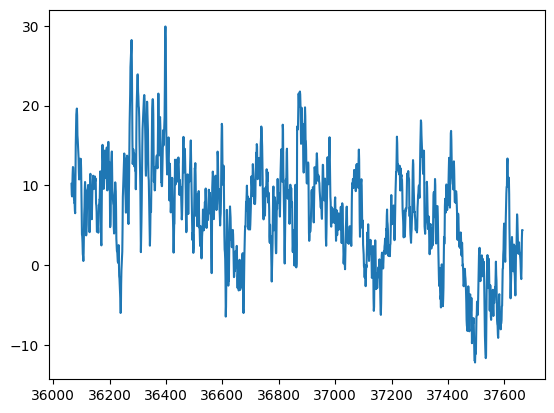

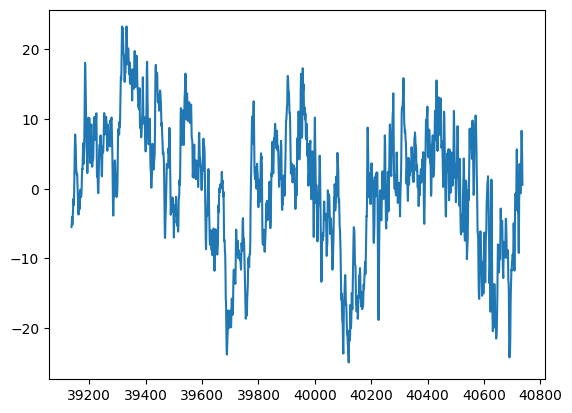

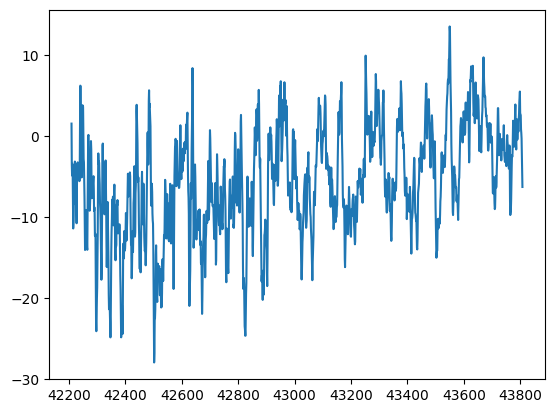

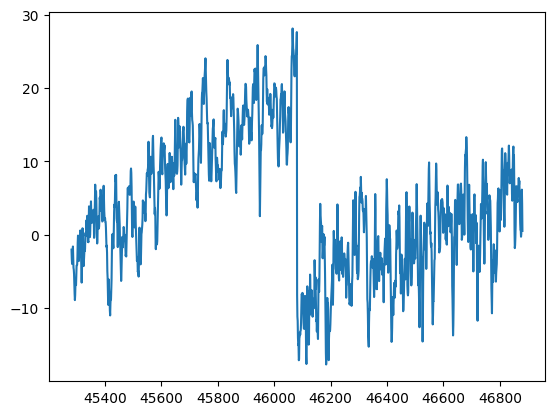

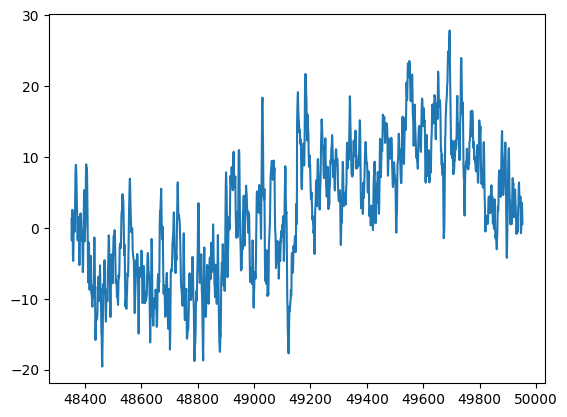

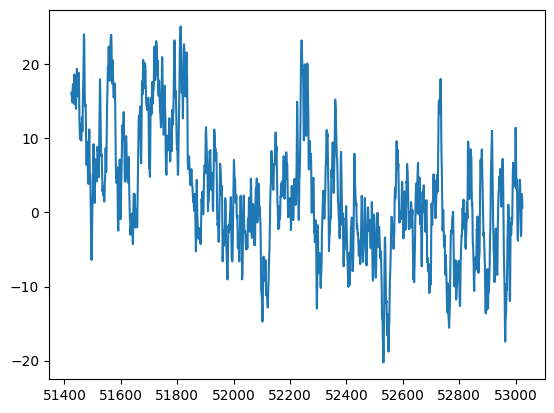

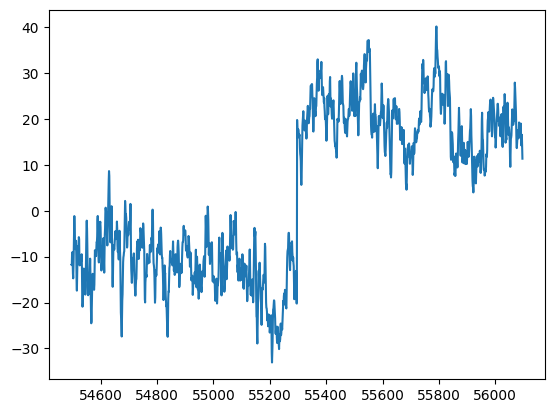

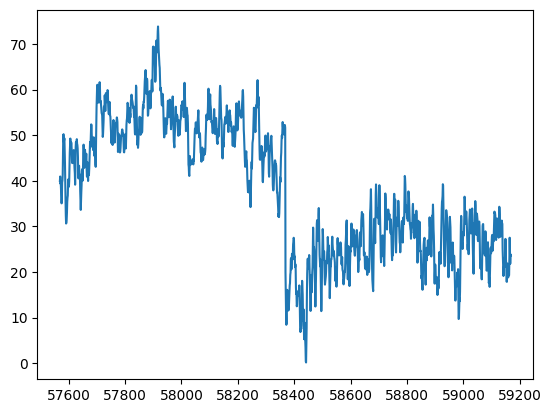

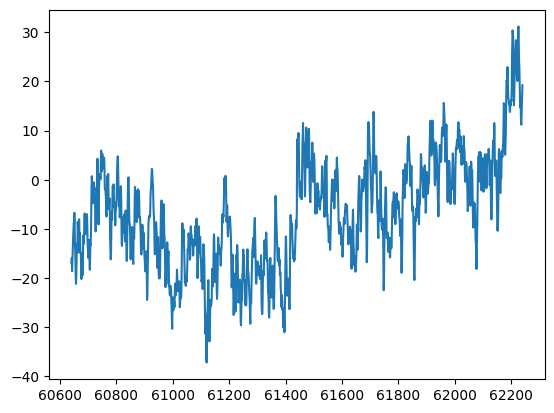

In [21]:
# sort by sample and plot

dfc1 = dfc1.sort_values(by=['sample'])
dfc1.reset_index(inplace=True, drop=True)
print(dfc1)

ss = 800

for ii in range(1, 20+1):
    fig = plt.figure(ii)
    plt.plot(dfc1['sample'][ii*3072-ss:ii*3072+ss], dfc1['Fp1'][ii*3072-ss:ii*3072+ss])
# NOTE: 75% of the plots are "smooth", so I think putting them in series should encode the right info

In [ ]:
# F- I-- N---